In [1]:
import os
import cv2
from ultralytics import YOLO
from tqdm.auto import tqdm
import shutil
from PIL import Image
from pathlib import Path
import prettyprinter as pp

HOME = os.getcwd()

<h4>Make Validation Dataset from Train Data</h4>

In [2]:
from dataLoader import DataLoader

data_base_path = Path("dataset/KITTI")

train_image_path = os.path.join(data_base_path, 'images','train')
train_image_label = os.path.join(data_base_path,'labels')
categories = Path("dataset/object_classes.json")

# data_loader = DataLoader(train_image_label, train_image_path, categories)
# data_loader.make_validation_set()

#create a .yaml file
# data_loader.make_yaml_file()


In [3]:
import yaml

file_path = "dataset/data.yaml"

with open(file_path, "r") as file:
    data = yaml.safe_load(file)

# pp.pprint(data)

<h4>Data Visualization</h4>

Some Sample Images: 


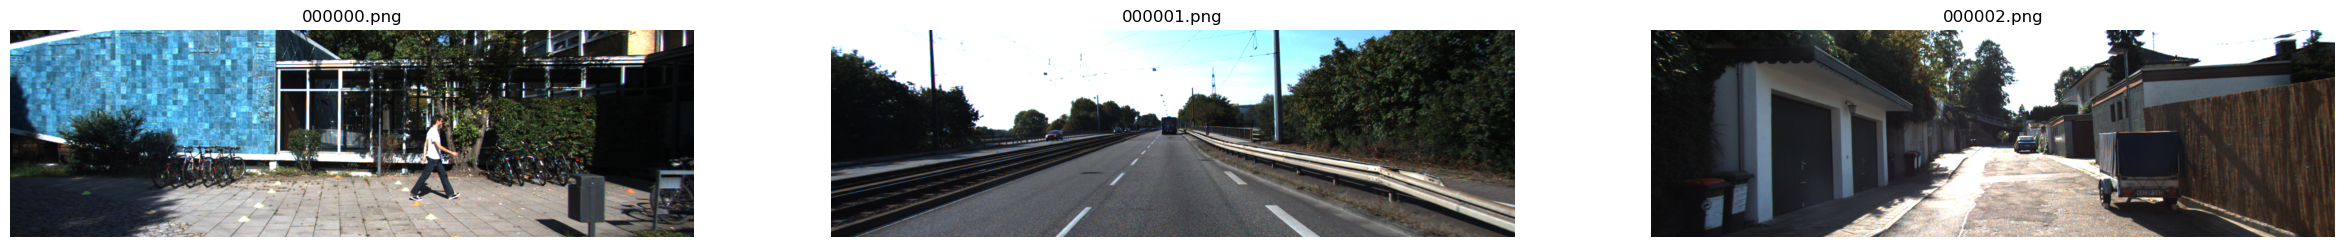

In [4]:
from dataExploration import DataExploration

train_image_path = Path("dataset/modified/train/images")
train_label_path = Path("dataset/modified/train/labels")

data_exploration = DataExploration(train_image_path, train_label_path)

#visualize images
data_exploration.visualize_image()

<h4>YOLOv8 Model</h4>

<h5>Parameter</h5>

In [5]:
data_src='dataset/data.yaml'
epochs=1
batch_size=16# Batch size
image_size=640  # Image size
project_name='model_output/YOLO_detection' # Project name
exp_name='Object Labeling'# Naming the experiment
device="cpu"

<h5>Train and Validate YOLOv8 Model</h5>

In [6]:
from model_YOLO import ModelYOLO

yolo_trainer = ModelYOLO()

# yolo_trainer.yolo_training(data_src, epochs, batch_size, image_size, project_name, exp_name, device)

d:\Cardiff Met\Advance AI and Robotics\Object Labeling and Segmentation\model_YOLO.py:52: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if folder_name is "val": pattern = r"^val\d*$"
d:\Cardiff Met\Advance AI and Robotics\Object Labeling and Segmentation\model_YOLO.py:53: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if folder_name is "predict": pattern = r"^predict\d*$"


<h5>Prediction for YOLOv8</h5>

In [7]:
from model_YOLO import ModelYOLO

yolo_pred = ModelYOLO()

test_dir = Path("dataset/KITTI/images/test")

# yolo_pred.prediction(test_dir)

<h5>Predicted Images Display</h5>

In [8]:
from model_YOLO import ModelYOLO

yolo_pred = ModelYOLO()

pred_img_dir = Path("runs/detect/predict")

# yolo_pred.plot_predicted_images(pred_img_dir)

<h5>YOLOv8 Evaluation</h5>

In [9]:
from model_YOLO import ModelYOLO

yolo_pred = ModelYOLO()

best_model_dir = Path("model_output/YOLO_detection/Object Labeling/weights/best.pt")

# yolo_pred.evaluation_on_validate(best_model_dir, data_src)

<h5>Evaluation Result</h5>

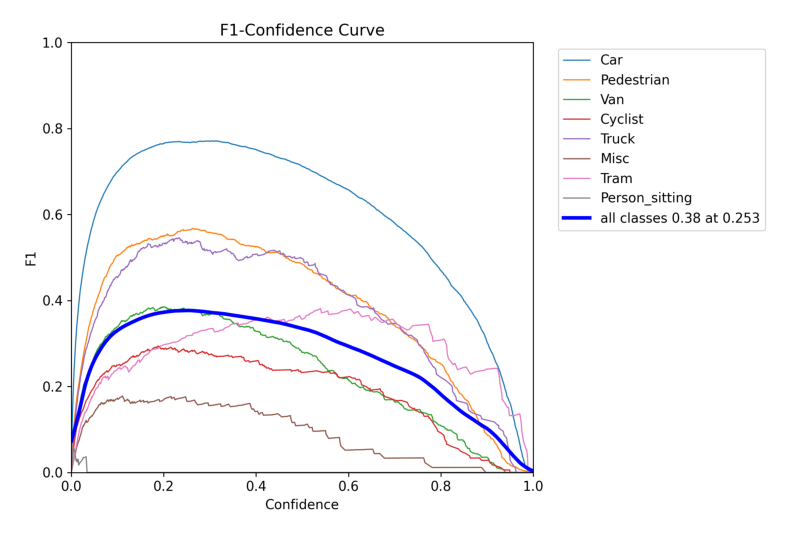

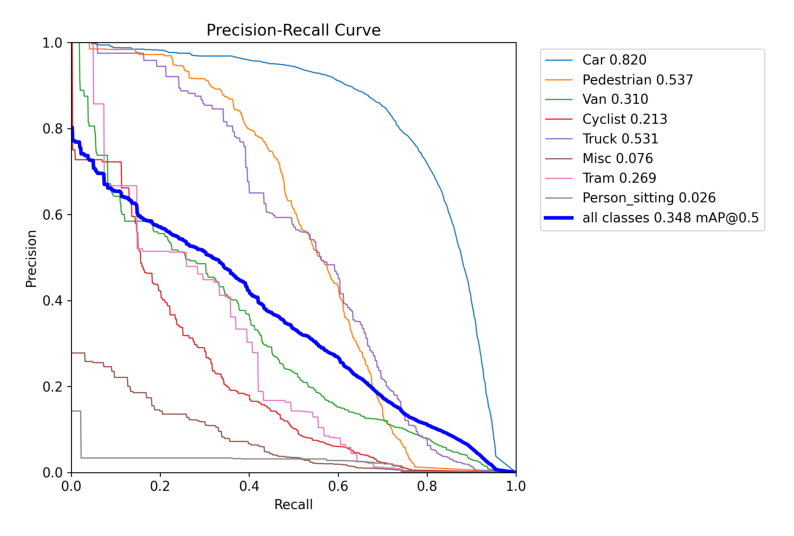

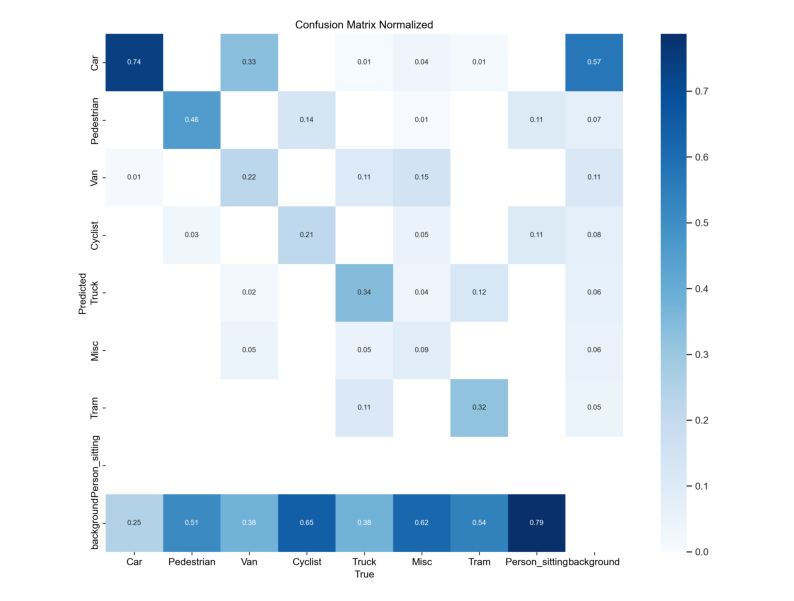

In [10]:
from model_YOLO import ModelYOLO

yolo_train = ModelYOLO()

output_dir = "runs/detect"

yolo_train.result_visualization(output_dir)